In [1]:
import funciones_nba_models
from funciones_nba_models import *

df = pd.read_csv('DataFrameForModel_0.1.csv')
df['Prob_W']= (df['Times_W']+0.5) / (df['Times_W']+df['Times_L']+1)
df['Prob_L']= 1 - df['Prob_W']
df['Result']=df['Result'].apply(lambda x: 'W' if 'W' in str(x) else 'L')

#### Iterar varias veces para asegurar que el accuracy es similar en diferentes escenarios

In [2]:
X = df._get_numeric_data()
y = df['Result']
y = pd.get_dummies(y, drop_first=True, dtype=int, columns=['Result'])

prob_inicial_W = df['Prob_W']
prob_inicial_L = df['Prob_L']

### BAYES NAIVE

In [3]:
accuracy_bayes = NaiveBayes(X, y, df)
accuracy_bayes

0.44

Nuestro modelo de Bayes no tiene buen rendimiento, dado que el peso dado por la probabilidad inicial hace que el accuracy de la predicción baje de manera notable.

### GAUSSIAN NB

In [4]:
d = {}
for i in range(10):    
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=200, random_state=i)
    gnb_acc_test, gnb_acc_train = GNB(Xtrain, Xtest, ytrain, ytest)
    d[i]=[gnb_acc_test, gnb_acc_train]

In [5]:
d

{0: [0.39, 0.4477266145380828],
 1: [0.48, 0.4425137561540689],
 2: [0.41, 0.4465682015638575],
 3: [0.495, 0.44164494642339996],
 4: [0.435, 0.4442513756154069],
 5: [0.39, 0.4471474080509702],
 6: [0.45, 0.4442513756154069],
 7: [0.39, 0.4477266145380828],
 8: [0.475, 0.4428033593976253],
 9: [0.505, 0.5603822762814944]}

### LOGISTIC REGRESSION

In [6]:
d = {}
for i in range(10):    
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=200, random_state=i)
    logr_acc_test, logr_acc_train = LogicRegression(Xtrain, Xtest, ytrain, ytest)
    d[i]=[logr_acc_test, logr_acc_train]

In [7]:
d

{0: [0.385, 0.4468578048074138],
 1: [0.48, 0.4413553431798436],
 2: [0.415, 0.4451201853460759],
 3: [0.49, 0.44077613669273097],
 4: [0.46, 0.4882710686359687],
 5: [0.395, 0.4462785983203012],
 6: [0.455, 0.4428033593976253],
 7: [0.39, 0.4465682015638575],
 8: [0.475, 0.44164494642339996],
 9: [0.495, 0.44048653344917466]}

El rendimiento de la predicción de nuestra regresión Logística es notablemente superior ya que tiene un accuracy mucho más alto y asumible para un modelo a futuro, además de que no cae en sobreajuste por lo que nos indica que este rendimiento es el máximo que puede ofrecernos.

### XGBOOST

In [8]:
d = {}
for i in range(10):    
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=200, random_state=i)
    xgb_acc_test, xgb_acc_train = XGB(Xtrain, Xtest, ytrain, ytest)
    d[i]=[xgb_acc_test, xgb_acc_train]

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


In [9]:
d

{0: [0.68, 0.6675354763973357],
 1: [0.66, 0.66956269910223],
 2: [0.655, 0.6692730958586737],
 3: [0.595, 0.6620330147697654],
 4: [0.58, 0.6710107153200116],
 5: [0.625, 0.6770923834346945],
 6: [0.665, 0.6710107153200116],
 7: [0.63, 0.6744859542426875],
 8: [0.64, 0.6675354763973357],
 9: [0.6, 0.6779611931653634]}

Tras varias pruebas ajustando los diferentes parámetros del modelo, hemos conseguido reducir el sobreajuste y aumentar el rendimiento del modelo, aunque aún sigue teniendo mejor rendimiento el modelo de Regresión Logística anterior, continuaremos probando modelos para comprobar si alguno supere en cuanto a rendimiento a este modelo de Regresión.

### RANDOM FOREST

In [10]:
d = {}
for i in range(10):    
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=200, random_state=i)
    rf_acc_test, rf_acc_train = RandomForest(Xtrain, Xtest, ytrain, ytest)
    d[i]=[rf_acc_test, rf_acc_train]

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


In [11]:
d

{0: [0.615, 0.5531421951925861],
 1: [0.52, 0.5586446568201564],
 2: [0.585, 0.5548798146539241],
 3: [0.51, 0.559223863307269],
 4: [0.565, 0.5560382276281495],
 5: [0.605, 0.5537214016796989],
 6: [0.545, 0.5571966406023747],
 7: [0.61, 0.5534317984361424],
 8: [0.525, 0.5583550535766001],
 9: [0.505, 0.5595134665508253]}

Tras realizar varias pruebas y reducir el sobreajuste, comprobamos que el rendimiento de Random Forest es peor que el de los otros dos modelos anteriores

### CAT BOOST

In [12]:
d = {}
for i in range(10):    
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=200, random_state=i)    
    cb_acc_test, cb_acc_train = CatBoost(Xtrain, Xtest, ytrain, ytest)
    d[i]=[cb_acc_test, cb_acc_train]

0:	learn: 0.6925843	total: 57.3ms	remaining: 5.67s
1:	learn: 0.6920234	total: 59.3ms	remaining: 2.9s
2:	learn: 0.6914281	total: 60.9ms	remaining: 1.97s
3:	learn: 0.6908300	total: 62.6ms	remaining: 1.5s
4:	learn: 0.6900076	total: 64.3ms	remaining: 1.22s
5:	learn: 0.6894244	total: 66.9ms	remaining: 1.05s
6:	learn: 0.6888439	total: 68.7ms	remaining: 913ms
7:	learn: 0.6882484	total: 70.6ms	remaining: 812ms
8:	learn: 0.6876612	total: 72.4ms	remaining: 732ms
9:	learn: 0.6872101	total: 74.1ms	remaining: 667ms
10:	learn: 0.6865938	total: 76.4ms	remaining: 618ms
11:	learn: 0.6860059	total: 78.4ms	remaining: 575ms
12:	learn: 0.6855766	total: 80.4ms	remaining: 538ms
13:	learn: 0.6851027	total: 82.8ms	remaining: 509ms
14:	learn: 0.6845412	total: 84.8ms	remaining: 480ms
15:	learn: 0.6840788	total: 87.5ms	remaining: 459ms
16:	learn: 0.6836629	total: 89.5ms	remaining: 437ms
17:	learn: 0.6832423	total: 91.7ms	remaining: 418ms
18:	learn: 0.6826996	total: 93.5ms	remaining: 399ms
19:	learn: 0.6822276	tot

0:	learn: 0.6924939	total: 2.51ms	remaining: 248ms
1:	learn: 0.6918093	total: 5.33ms	remaining: 261ms
2:	learn: 0.6911425	total: 10.3ms	remaining: 334ms
3:	learn: 0.6904468	total: 14.2ms	remaining: 340ms
4:	learn: 0.6897252	total: 16.2ms	remaining: 307ms
5:	learn: 0.6891922	total: 18.7ms	remaining: 294ms
6:	learn: 0.6887568	total: 20.4ms	remaining: 271ms
7:	learn: 0.6881762	total: 22.1ms	remaining: 254ms
8:	learn: 0.6877374	total: 24.9ms	remaining: 252ms
9:	learn: 0.6868457	total: 26.9ms	remaining: 242ms
10:	learn: 0.6862805	total: 28.9ms	remaining: 234ms
11:	learn: 0.6856899	total: 30.8ms	remaining: 226ms
12:	learn: 0.6850359	total: 33ms	remaining: 221ms
13:	learn: 0.6844665	total: 34.8ms	remaining: 214ms
14:	learn: 0.6838662	total: 36.9ms	remaining: 209ms
15:	learn: 0.6831880	total: 39.7ms	remaining: 209ms
16:	learn: 0.6825185	total: 42.2ms	remaining: 206ms
17:	learn: 0.6820209	total: 46.1ms	remaining: 210ms
18:	learn: 0.6816107	total: 48.1ms	remaining: 205ms
19:	learn: 0.6810578	tot

35:	learn: 0.6697801	total: 74.6ms	remaining: 133ms
36:	learn: 0.6692635	total: 76.8ms	remaining: 131ms
37:	learn: 0.6688177	total: 78.7ms	remaining: 128ms
38:	learn: 0.6682264	total: 81.5ms	remaining: 127ms
39:	learn: 0.6677815	total: 84ms	remaining: 126ms
40:	learn: 0.6673763	total: 86ms	remaining: 124ms
41:	learn: 0.6669344	total: 87.8ms	remaining: 121ms
42:	learn: 0.6665656	total: 89.7ms	remaining: 119ms
43:	learn: 0.6661339	total: 92.4ms	remaining: 118ms
44:	learn: 0.6656298	total: 94.7ms	remaining: 116ms
45:	learn: 0.6650814	total: 96.9ms	remaining: 114ms
46:	learn: 0.6645338	total: 98.9ms	remaining: 112ms
47:	learn: 0.6638603	total: 101ms	remaining: 110ms
48:	learn: 0.6633022	total: 103ms	remaining: 107ms
49:	learn: 0.6629348	total: 105ms	remaining: 105ms
50:	learn: 0.6626407	total: 108ms	remaining: 104ms
51:	learn: 0.6620889	total: 110ms	remaining: 101ms
52:	learn: 0.6616339	total: 112ms	remaining: 99.1ms
53:	learn: 0.6611074	total: 114ms	remaining: 97.4ms
54:	learn: 0.6607108	

0:	learn: 0.6924119	total: 2.48ms	remaining: 246ms
1:	learn: 0.6918450	total: 4.5ms	remaining: 221ms
2:	learn: 0.6911375	total: 6.38ms	remaining: 206ms
3:	learn: 0.6905258	total: 8.47ms	remaining: 203ms
4:	learn: 0.6898741	total: 10.8ms	remaining: 206ms
5:	learn: 0.6892357	total: 12.6ms	remaining: 198ms
6:	learn: 0.6888320	total: 16ms	remaining: 213ms
7:	learn: 0.6881751	total: 18.8ms	remaining: 217ms
8:	learn: 0.6877147	total: 20.8ms	remaining: 210ms
9:	learn: 0.6872556	total: 23.1ms	remaining: 208ms
10:	learn: 0.6865788	total: 25.2ms	remaining: 204ms
11:	learn: 0.6860958	total: 27.8ms	remaining: 204ms
12:	learn: 0.6856324	total: 29.9ms	remaining: 200ms
13:	learn: 0.6850749	total: 32.1ms	remaining: 197ms
14:	learn: 0.6845298	total: 34.4ms	remaining: 195ms
15:	learn: 0.6839391	total: 36.5ms	remaining: 192ms
16:	learn: 0.6832892	total: 38.8ms	remaining: 190ms
17:	learn: 0.6827848	total: 40.7ms	remaining: 185ms
18:	learn: 0.6822848	total: 42.7ms	remaining: 182ms
19:	learn: 0.6817967	tota

64:	learn: 0.6633512	total: 159ms	remaining: 85.4ms
65:	learn: 0.6630025	total: 161ms	remaining: 83.1ms
66:	learn: 0.6627320	total: 165ms	remaining: 81.4ms
67:	learn: 0.6623288	total: 167ms	remaining: 78.8ms
68:	learn: 0.6618734	total: 170ms	remaining: 76.3ms
69:	learn: 0.6616401	total: 172ms	remaining: 73.7ms
70:	learn: 0.6613306	total: 175ms	remaining: 71.6ms
71:	learn: 0.6610418	total: 179ms	remaining: 69.7ms
72:	learn: 0.6607514	total: 182ms	remaining: 67.5ms
73:	learn: 0.6605391	total: 187ms	remaining: 65.5ms
74:	learn: 0.6601782	total: 189ms	remaining: 62.9ms
75:	learn: 0.6598433	total: 192ms	remaining: 60.6ms
76:	learn: 0.6595881	total: 194ms	remaining: 58ms
77:	learn: 0.6593345	total: 197ms	remaining: 55.4ms
78:	learn: 0.6590816	total: 200ms	remaining: 53.1ms
79:	learn: 0.6588378	total: 202ms	remaining: 50.5ms
80:	learn: 0.6585305	total: 204ms	remaining: 48ms
81:	learn: 0.6582735	total: 207ms	remaining: 45.5ms
82:	learn: 0.6580023	total: 210ms	remaining: 43ms
83:	learn: 0.65770

94:	learn: 0.6507768	total: 200ms	remaining: 10.5ms
95:	learn: 0.6505154	total: 202ms	remaining: 8.43ms
96:	learn: 0.6502742	total: 204ms	remaining: 6.32ms
97:	learn: 0.6500342	total: 206ms	remaining: 4.2ms
98:	learn: 0.6498209	total: 208ms	remaining: 2.1ms
99:	learn: 0.6495969	total: 210ms	remaining: 0us
0:	learn: 0.6924185	total: 1.65ms	remaining: 163ms
1:	learn: 0.6917318	total: 3.24ms	remaining: 159ms
2:	learn: 0.6909764	total: 4.66ms	remaining: 151ms
3:	learn: 0.6904069	total: 6.18ms	remaining: 148ms
4:	learn: 0.6898054	total: 7.85ms	remaining: 149ms
5:	learn: 0.6891712	total: 9.27ms	remaining: 145ms
6:	learn: 0.6885684	total: 10.9ms	remaining: 145ms
7:	learn: 0.6877371	total: 12.9ms	remaining: 149ms
8:	learn: 0.6870668	total: 14.4ms	remaining: 146ms
9:	learn: 0.6865044	total: 15.9ms	remaining: 144ms
10:	learn: 0.6859037	total: 17.5ms	remaining: 142ms
11:	learn: 0.6853219	total: 19.8ms	remaining: 145ms
12:	learn: 0.6845788	total: 21.8ms	remaining: 146ms
13:	learn: 0.6840591	total:

0:	learn: 0.6924855	total: 1.53ms	remaining: 152ms
1:	learn: 0.6917933	total: 3.08ms	remaining: 151ms
2:	learn: 0.6911541	total: 5.38ms	remaining: 174ms
3:	learn: 0.6904699	total: 6.98ms	remaining: 167ms
4:	learn: 0.6898661	total: 9.41ms	remaining: 179ms
5:	learn: 0.6891970	total: 11ms	remaining: 173ms
6:	learn: 0.6886661	total: 12.6ms	remaining: 167ms
7:	learn: 0.6880422	total: 14.1ms	remaining: 162ms
8:	learn: 0.6874499	total: 15.7ms	remaining: 159ms
9:	learn: 0.6868288	total: 17.3ms	remaining: 156ms
10:	learn: 0.6861043	total: 18.9ms	remaining: 153ms
11:	learn: 0.6856259	total: 20.4ms	remaining: 149ms
12:	learn: 0.6847535	total: 21.8ms	remaining: 146ms
13:	learn: 0.6840837	total: 23.3ms	remaining: 143ms
14:	learn: 0.6833576	total: 24.8ms	remaining: 141ms
15:	learn: 0.6827783	total: 26.2ms	remaining: 138ms
16:	learn: 0.6821305	total: 27.7ms	remaining: 135ms
17:	learn: 0.6815939	total: 29.1ms	remaining: 133ms
18:	learn: 0.6809529	total: 30.8ms	remaining: 131ms
19:	learn: 0.6803703	tot

22:	learn: 0.6768917	total: 38.3ms	remaining: 128ms
23:	learn: 0.6763008	total: 40.6ms	remaining: 129ms
24:	learn: 0.6756205	total: 42.1ms	remaining: 126ms
25:	learn: 0.6752021	total: 43.5ms	remaining: 124ms
26:	learn: 0.6747034	total: 45.1ms	remaining: 122ms
27:	learn: 0.6740208	total: 46.7ms	remaining: 120ms
28:	learn: 0.6734994	total: 49.1ms	remaining: 120ms
29:	learn: 0.6729581	total: 50.7ms	remaining: 118ms
30:	learn: 0.6723832	total: 52.1ms	remaining: 116ms
31:	learn: 0.6718090	total: 53.6ms	remaining: 114ms
32:	learn: 0.6712667	total: 55.1ms	remaining: 112ms
33:	learn: 0.6705906	total: 56.6ms	remaining: 110ms
34:	learn: 0.6699453	total: 58ms	remaining: 108ms
35:	learn: 0.6694550	total: 59.6ms	remaining: 106ms
36:	learn: 0.6689392	total: 61.2ms	remaining: 104ms
37:	learn: 0.6683226	total: 62.9ms	remaining: 103ms
38:	learn: 0.6678851	total: 64.3ms	remaining: 101ms
39:	learn: 0.6674008	total: 65.8ms	remaining: 98.7ms
40:	learn: 0.6669056	total: 67.4ms	remaining: 96.9ms
41:	learn: 0

30:	learn: 0.6727676	total: 55.4ms	remaining: 123ms
31:	learn: 0.6722303	total: 57.6ms	remaining: 122ms
32:	learn: 0.6717398	total: 59.7ms	remaining: 121ms
33:	learn: 0.6713863	total: 61.8ms	remaining: 120ms
34:	learn: 0.6708268	total: 64ms	remaining: 119ms
35:	learn: 0.6702963	total: 66.1ms	remaining: 117ms
36:	learn: 0.6697401	total: 68.3ms	remaining: 116ms
37:	learn: 0.6691686	total: 69.9ms	remaining: 114ms
38:	learn: 0.6686193	total: 71.5ms	remaining: 112ms
39:	learn: 0.6681253	total: 74.1ms	remaining: 111ms
40:	learn: 0.6677290	total: 76.3ms	remaining: 110ms
41:	learn: 0.6672172	total: 78.3ms	remaining: 108ms
42:	learn: 0.6668598	total: 80.2ms	remaining: 106ms
43:	learn: 0.6663592	total: 82.3ms	remaining: 105ms
44:	learn: 0.6659211	total: 84.7ms	remaining: 104ms
45:	learn: 0.6654490	total: 87.4ms	remaining: 103ms
46:	learn: 0.6651144	total: 90ms	remaining: 101ms
47:	learn: 0.6646087	total: 92.4ms	remaining: 100ms
48:	learn: 0.6642177	total: 94.9ms	remaining: 98.8ms
49:	learn: 0.66

0:	learn: 0.6923205	total: 1.65ms	remaining: 163ms
1:	learn: 0.6915969	total: 3.94ms	remaining: 193ms
2:	learn: 0.6908703	total: 5.72ms	remaining: 185ms
3:	learn: 0.6902285	total: 7.96ms	remaining: 191ms
4:	learn: 0.6896061	total: 9.65ms	remaining: 183ms
5:	learn: 0.6889567	total: 11.4ms	remaining: 178ms
6:	learn: 0.6882700	total: 13.6ms	remaining: 181ms
7:	learn: 0.6875448	total: 16.3ms	remaining: 187ms
8:	learn: 0.6870175	total: 18.9ms	remaining: 192ms
9:	learn: 0.6865347	total: 21.6ms	remaining: 194ms
10:	learn: 0.6860398	total: 23.8ms	remaining: 192ms
11:	learn: 0.6854701	total: 25.9ms	remaining: 190ms
12:	learn: 0.6849400	total: 27.2ms	remaining: 182ms
13:	learn: 0.6843605	total: 28.9ms	remaining: 178ms
14:	learn: 0.6838509	total: 30.5ms	remaining: 173ms
15:	learn: 0.6832710	total: 32.2ms	remaining: 169ms
16:	learn: 0.6825664	total: 33.7ms	remaining: 165ms
17:	learn: 0.6820284	total: 35.3ms	remaining: 161ms
18:	learn: 0.6815048	total: 36.9ms	remaining: 157ms
19:	learn: 0.6807577	t

6:	learn: 0.6888508	total: 11.6ms	remaining: 155ms
7:	learn: 0.6883274	total: 13.4ms	remaining: 154ms
8:	learn: 0.6877350	total: 15.1ms	remaining: 152ms
9:	learn: 0.6872290	total: 16.6ms	remaining: 149ms
10:	learn: 0.6863591	total: 18.2ms	remaining: 147ms
11:	learn: 0.6858567	total: 19.7ms	remaining: 144ms
12:	learn: 0.6853234	total: 21.3ms	remaining: 142ms
13:	learn: 0.6847732	total: 22.9ms	remaining: 141ms
14:	learn: 0.6841614	total: 25ms	remaining: 142ms
15:	learn: 0.6836388	total: 27.1ms	remaining: 142ms
16:	learn: 0.6830305	total: 28.8ms	remaining: 141ms
17:	learn: 0.6825726	total: 30.5ms	remaining: 139ms
18:	learn: 0.6821322	total: 31.9ms	remaining: 136ms
19:	learn: 0.6816267	total: 33.6ms	remaining: 134ms
20:	learn: 0.6810129	total: 35.1ms	remaining: 132ms
21:	learn: 0.6805087	total: 36.5ms	remaining: 129ms
22:	learn: 0.6799596	total: 38.1ms	remaining: 127ms
23:	learn: 0.6794825	total: 39.9ms	remaining: 126ms
24:	learn: 0.6788649	total: 41.9ms	remaining: 126ms
25:	learn: 0.67838

3:	learn: 0.6905661	total: 8.31ms	remaining: 199ms
4:	learn: 0.6897608	total: 10.9ms	remaining: 207ms
5:	learn: 0.6891687	total: 12.7ms	remaining: 200ms
6:	learn: 0.6884220	total: 16.5ms	remaining: 220ms
7:	learn: 0.6877634	total: 18.7ms	remaining: 215ms
8:	learn: 0.6872998	total: 21.1ms	remaining: 214ms
9:	learn: 0.6867237	total: 23.4ms	remaining: 210ms
10:	learn: 0.6861803	total: 26.1ms	remaining: 211ms
11:	learn: 0.6853509	total: 28.7ms	remaining: 211ms
12:	learn: 0.6848203	total: 31.5ms	remaining: 211ms
13:	learn: 0.6841907	total: 33.9ms	remaining: 208ms
14:	learn: 0.6837079	total: 35.4ms	remaining: 201ms
15:	learn: 0.6831769	total: 37.4ms	remaining: 196ms
16:	learn: 0.6825846	total: 39.5ms	remaining: 193ms
17:	learn: 0.6818622	total: 41.4ms	remaining: 189ms
18:	learn: 0.6813290	total: 43.2ms	remaining: 184ms
19:	learn: 0.6808916	total: 45.7ms	remaining: 183ms
20:	learn: 0.6803721	total: 47.3ms	remaining: 178ms
21:	learn: 0.6798638	total: 48.9ms	remaining: 173ms
22:	learn: 0.679338

1:	learn: 0.6917477	total: 3.69ms	remaining: 181ms
2:	learn: 0.6911511	total: 5.49ms	remaining: 178ms
3:	learn: 0.6904334	total: 7.04ms	remaining: 169ms
4:	learn: 0.6898106	total: 9.15ms	remaining: 174ms
5:	learn: 0.6890962	total: 10.5ms	remaining: 165ms
6:	learn: 0.6882746	total: 12.1ms	remaining: 161ms
7:	learn: 0.6875521	total: 13.8ms	remaining: 159ms
8:	learn: 0.6871182	total: 15.2ms	remaining: 154ms
9:	learn: 0.6866514	total: 16.7ms	remaining: 150ms
10:	learn: 0.6860866	total: 18.4ms	remaining: 149ms
11:	learn: 0.6853620	total: 20ms	remaining: 147ms
12:	learn: 0.6847798	total: 21.7ms	remaining: 146ms
13:	learn: 0.6842562	total: 23.4ms	remaining: 143ms
14:	learn: 0.6837070	total: 25.1ms	remaining: 142ms
15:	learn: 0.6832658	total: 26.6ms	remaining: 140ms
16:	learn: 0.6827591	total: 28.1ms	remaining: 137ms
17:	learn: 0.6822844	total: 29.6ms	remaining: 135ms
18:	learn: 0.6814593	total: 31ms	remaining: 132ms
19:	learn: 0.6809654	total: 32.6ms	remaining: 130ms
20:	learn: 0.6804820	tota

26:	learn: 0.6764003	total: 42.4ms	remaining: 115ms
27:	learn: 0.6758227	total: 44.1ms	remaining: 113ms
28:	learn: 0.6751986	total: 45.6ms	remaining: 112ms
29:	learn: 0.6747077	total: 47.8ms	remaining: 111ms
30:	learn: 0.6741916	total: 49.4ms	remaining: 110ms
31:	learn: 0.6736749	total: 51.6ms	remaining: 110ms
32:	learn: 0.6731481	total: 54.1ms	remaining: 110ms
33:	learn: 0.6726431	total: 56.1ms	remaining: 109ms
34:	learn: 0.6722120	total: 57.7ms	remaining: 107ms
35:	learn: 0.6717771	total: 60.3ms	remaining: 107ms
36:	learn: 0.6711854	total: 62.1ms	remaining: 106ms
37:	learn: 0.6707273	total: 63.8ms	remaining: 104ms
38:	learn: 0.6703195	total: 65.7ms	remaining: 103ms
39:	learn: 0.6697828	total: 67.5ms	remaining: 101ms
40:	learn: 0.6693478	total: 70ms	remaining: 101ms
41:	learn: 0.6689515	total: 71.4ms	remaining: 98.6ms
42:	learn: 0.6686140	total: 72.9ms	remaining: 96.6ms
43:	learn: 0.6681356	total: 74.4ms	remaining: 94.7ms
44:	learn: 0.6676951	total: 75.9ms	remaining: 92.7ms
45:	learn:

23:	learn: 0.6806038	total: 54.5ms	remaining: 173ms
24:	learn: 0.6800926	total: 57.1ms	remaining: 171ms
25:	learn: 0.6797065	total: 59.7ms	remaining: 170ms
26:	learn: 0.6792723	total: 61.6ms	remaining: 167ms
27:	learn: 0.6788333	total: 64.3ms	remaining: 165ms
28:	learn: 0.6783594	total: 66.5ms	remaining: 163ms
29:	learn: 0.6779867	total: 68.5ms	remaining: 160ms
30:	learn: 0.6776554	total: 70.7ms	remaining: 157ms
31:	learn: 0.6772606	total: 78.1ms	remaining: 166ms
32:	learn: 0.6768253	total: 83.6ms	remaining: 170ms
33:	learn: 0.6763903	total: 85.5ms	remaining: 166ms
34:	learn: 0.6760103	total: 88.5ms	remaining: 164ms
35:	learn: 0.6755066	total: 90.7ms	remaining: 161ms
36:	learn: 0.6750707	total: 93.4ms	remaining: 159ms
37:	learn: 0.6746351	total: 96.7ms	remaining: 158ms
38:	learn: 0.6742350	total: 99ms	remaining: 155ms
39:	learn: 0.6737090	total: 101ms	remaining: 152ms
40:	learn: 0.6732767	total: 103ms	remaining: 148ms
41:	learn: 0.6728660	total: 106ms	remaining: 146ms
42:	learn: 0.6723

98:	learn: 0.6454747	total: 176ms	remaining: 1.78ms
99:	learn: 0.6451559	total: 178ms	remaining: 0us
0:	learn: 0.6925999	total: 1.8ms	remaining: 179ms
1:	learn: 0.6920310	total: 3.31ms	remaining: 162ms
2:	learn: 0.6913154	total: 4.89ms	remaining: 158ms
3:	learn: 0.6906255	total: 6.44ms	remaining: 155ms
4:	learn: 0.6898219	total: 8.01ms	remaining: 152ms
5:	learn: 0.6892117	total: 9.58ms	remaining: 150ms
6:	learn: 0.6886089	total: 11.2ms	remaining: 148ms
7:	learn: 0.6879699	total: 12.8ms	remaining: 147ms
8:	learn: 0.6874012	total: 15ms	remaining: 152ms
9:	learn: 0.6867973	total: 16.6ms	remaining: 150ms
10:	learn: 0.6859770	total: 18.2ms	remaining: 148ms
11:	learn: 0.6853457	total: 19.8ms	remaining: 145ms
12:	learn: 0.6847654	total: 21.3ms	remaining: 142ms
13:	learn: 0.6842308	total: 22.7ms	remaining: 139ms
14:	learn: 0.6836332	total: 24.1ms	remaining: 137ms
15:	learn: 0.6831294	total: 25.6ms	remaining: 135ms
16:	learn: 0.6826385	total: 27.2ms	remaining: 133ms
17:	learn: 0.6820297	total: 

29:	learn: 0.6755648	total: 50.5ms	remaining: 118ms
30:	learn: 0.6750717	total: 52.5ms	remaining: 117ms
31:	learn: 0.6746337	total: 54.4ms	remaining: 116ms
32:	learn: 0.6741946	total: 56.1ms	remaining: 114ms
33:	learn: 0.6737131	total: 57.8ms	remaining: 112ms
34:	learn: 0.6732333	total: 60.2ms	remaining: 112ms
35:	learn: 0.6727395	total: 61.8ms	remaining: 110ms
36:	learn: 0.6722969	total: 63.5ms	remaining: 108ms
37:	learn: 0.6718438	total: 65ms	remaining: 106ms
38:	learn: 0.6714262	total: 66.7ms	remaining: 104ms
39:	learn: 0.6710388	total: 68.3ms	remaining: 102ms
40:	learn: 0.6706312	total: 70.2ms	remaining: 101ms
41:	learn: 0.6702057	total: 71.8ms	remaining: 99.1ms
42:	learn: 0.6696891	total: 73.4ms	remaining: 97.3ms
43:	learn: 0.6692375	total: 74.9ms	remaining: 95.4ms
44:	learn: 0.6688479	total: 76.3ms	remaining: 93.2ms
45:	learn: 0.6684367	total: 77.8ms	remaining: 91.3ms
46:	learn: 0.6680944	total: 79.5ms	remaining: 89.7ms
47:	learn: 0.6675869	total: 81.2ms	remaining: 87.9ms
48:	lea

44:	learn: 0.6662899	total: 72ms	remaining: 88ms
45:	learn: 0.6659343	total: 73.5ms	remaining: 86.3ms
46:	learn: 0.6655428	total: 74.9ms	remaining: 84.5ms
47:	learn: 0.6651383	total: 76.4ms	remaining: 82.8ms
48:	learn: 0.6647849	total: 77.9ms	remaining: 81.1ms
49:	learn: 0.6643706	total: 79.5ms	remaining: 79.5ms
50:	learn: 0.6638734	total: 81.4ms	remaining: 78.2ms
51:	learn: 0.6633993	total: 82.8ms	remaining: 76.4ms
52:	learn: 0.6630447	total: 84.3ms	remaining: 74.8ms
53:	learn: 0.6625476	total: 85.9ms	remaining: 73.2ms
54:	learn: 0.6621455	total: 87.9ms	remaining: 71.9ms
55:	learn: 0.6616892	total: 89.7ms	remaining: 70.5ms
56:	learn: 0.6613534	total: 91.9ms	remaining: 69.3ms
57:	learn: 0.6608934	total: 93.5ms	remaining: 67.7ms
58:	learn: 0.6605026	total: 94.9ms	remaining: 65.9ms
59:	learn: 0.6600550	total: 96.5ms	remaining: 64.3ms
60:	learn: 0.6597216	total: 98ms	remaining: 62.6ms
61:	learn: 0.6593473	total: 99.8ms	remaining: 61.1ms
62:	learn: 0.6589864	total: 102ms	remaining: 59.6ms


58:	learn: 0.6587138	total: 96.6ms	remaining: 67.1ms
59:	learn: 0.6582839	total: 98.3ms	remaining: 65.5ms
60:	learn: 0.6578396	total: 99.7ms	remaining: 63.7ms
61:	learn: 0.6574745	total: 101ms	remaining: 62ms
62:	learn: 0.6570430	total: 103ms	remaining: 60.2ms
63:	learn: 0.6567258	total: 104ms	remaining: 58.5ms
64:	learn: 0.6561864	total: 106ms	remaining: 57ms
65:	learn: 0.6558092	total: 108ms	remaining: 55.7ms
66:	learn: 0.6552887	total: 110ms	remaining: 54.2ms
67:	learn: 0.6549447	total: 112ms	remaining: 52.7ms
68:	learn: 0.6544199	total: 114ms	remaining: 51.2ms
69:	learn: 0.6539893	total: 115ms	remaining: 49.4ms
70:	learn: 0.6536027	total: 118ms	remaining: 48.1ms
71:	learn: 0.6533457	total: 119ms	remaining: 46.4ms
72:	learn: 0.6529706	total: 121ms	remaining: 44.7ms
73:	learn: 0.6526086	total: 123ms	remaining: 43ms
74:	learn: 0.6522891	total: 124ms	remaining: 41.4ms
75:	learn: 0.6519998	total: 126ms	remaining: 39.7ms
76:	learn: 0.6515241	total: 127ms	remaining: 38ms
77:	learn: 0.6510

89:	learn: 0.6515864	total: 141ms	remaining: 15.7ms
90:	learn: 0.6513216	total: 143ms	remaining: 14.1ms
91:	learn: 0.6509086	total: 145ms	remaining: 12.6ms
92:	learn: 0.6506004	total: 147ms	remaining: 11.1ms
93:	learn: 0.6503940	total: 149ms	remaining: 9.49ms
94:	learn: 0.6501243	total: 152ms	remaining: 7.98ms
95:	learn: 0.6498957	total: 153ms	remaining: 6.38ms
96:	learn: 0.6495517	total: 155ms	remaining: 4.8ms
97:	learn: 0.6492322	total: 157ms	remaining: 3.2ms
98:	learn: 0.6489725	total: 159ms	remaining: 1.6ms
99:	learn: 0.6486899	total: 160ms	remaining: 0us
0:	learn: 0.6923590	total: 2.16ms	remaining: 214ms
1:	learn: 0.6918408	total: 5.27ms	remaining: 258ms
2:	learn: 0.6911025	total: 7.78ms	remaining: 252ms
3:	learn: 0.6905100	total: 9.51ms	remaining: 228ms
4:	learn: 0.6898749	total: 11.2ms	remaining: 213ms
5:	learn: 0.6891308	total: 13.7ms	remaining: 215ms
6:	learn: 0.6885510	total: 15.4ms	remaining: 205ms
7:	learn: 0.6877761	total: 17ms	remaining: 195ms
8:	learn: 0.6872197	total: 1

In [13]:
d

{0: [0.64, 0.649290472053287],
 1: [0.645, 0.6504488850275123],
 2: [0.655, 0.6507384882710686],
 3: [0.655, 0.6539241239501883],
 4: [0.625, 0.6495800752968434],
 5: [0.66, 0.6475528525919491],
 6: [0.63, 0.651896901245294],
 7: [0.655, 0.6550825369244135],
 8: [0.59, 0.6487112655661743],
 9: [0.59, 0.6504488850275123]}

Tras ajustar parámetros y reducir sobreajuste comoprobamos que este modelo tiene buena performance, muy parecida al modelo de Regresión Logística.

### NEURAL NETWORK

In [14]:
d = {}
for i in range(3):    
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=200, random_state=i)
    nn_acc_test, nn_acc_train = NeuralNet(Xtrain, Xtest, ytrain, ytest)
    d[i]=[nn_acc_test, nn_acc_train]

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Fitting 3 folds for each of 16 candidates, totalling 48 fits


In [15]:
d

{0: [0.64, 0.6322038806834637],
 1: [0.635, 0.6264118158123371],
 2: [0.6, 0.6692730958586737]}

Este modelo de redes neuronales también tiene una buena performance, aún así dista de la regresión logística y de los gradient boost en unos 2 puntos de diferencia.

### VOTING  DE LOS 3 MEJORES MODELOS
Dado que tenemos tres modelos con puntajes de precisión bastante similares, hemos considerado utilizar un modelo de votación (Voting Classifier) para combinar las predicciones de estos modelos y obtener una predicción final.

In [16]:
d = {}
for i in range(3):    
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=200, random_state=i)
    voting_test, voting_train, pred = voting_3bests(Xtrain, Xtest, ytrain, ytest)
    d[i]=[voting_test, voting_train, pred]

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
0:	learn: 0.6925843	total: 3.22ms	remaining: 319ms
1:	learn: 0.6920234	total: 5.53ms	remaining: 271ms
2:	learn: 0.6914281	total: 7.57ms	remaining: 245ms
3:	learn: 0.6908300	total: 9.18ms	remaining: 220ms
4:	learn: 0.6900076	total: 10.7ms	remaining: 202ms
5:	learn: 0.6894244	total: 12.3ms	remaining: 193ms
6:	learn: 0.6888439	total: 14ms	remaining: 186ms
7:	learn: 0.6882484	total: 16.4ms	remaining: 189ms
8:	learn: 0.6876612	total: 18.1ms	remaining: 183ms
9:	learn: 0.6872101	total: 19.8ms	remaining: 178ms
10:	learn: 0.6865938	total: 21.3ms	remaining: 172ms
11:	learn: 0.6860059	total: 23.1ms	remaining: 170ms
12:	learn: 0.6855766	total: 24.8ms	remaining: 166ms
13:	learn: 0.6851027	total: 26.6ms	remaining: 163ms
14:	learn: 0.6845412	total: 28.2ms	remaining: 160ms
15:	learn: 0.6840788	total: 30.2ms	remaining: 158ms
16:	learn: 0.6836629	total: 31.9ms	remaining: 156ms
17:	lear

15:	learn: 0.6831880	total: 26.7ms	remaining: 140ms
16:	learn: 0.6825185	total: 28.4ms	remaining: 139ms
17:	learn: 0.6820209	total: 29.9ms	remaining: 136ms
18:	learn: 0.6816107	total: 31.5ms	remaining: 134ms
19:	learn: 0.6810578	total: 33.2ms	remaining: 133ms
20:	learn: 0.6804906	total: 35.8ms	remaining: 135ms
21:	learn: 0.6799512	total: 37.8ms	remaining: 134ms
22:	learn: 0.6793982	total: 39.5ms	remaining: 132ms
23:	learn: 0.6788448	total: 41.3ms	remaining: 131ms
24:	learn: 0.6782684	total: 43.7ms	remaining: 131ms
25:	learn: 0.6778318	total: 45.6ms	remaining: 130ms
26:	learn: 0.6774322	total: 48.9ms	remaining: 132ms
27:	learn: 0.6769601	total: 51ms	remaining: 131ms
28:	learn: 0.6762759	total: 52.7ms	remaining: 129ms
29:	learn: 0.6758035	total: 54.3ms	remaining: 127ms
30:	learn: 0.6751023	total: 55.9ms	remaining: 124ms
31:	learn: 0.6746611	total: 57.9ms	remaining: 123ms
32:	learn: 0.6742615	total: 60.4ms	remaining: 123ms
33:	learn: 0.6738590	total: 63.7ms	remaining: 124ms
34:	learn: 0.6

0:	learn: 0.6924216	total: 2.84ms	remaining: 281ms
1:	learn: 0.6918049	total: 5.12ms	remaining: 251ms
2:	learn: 0.6910153	total: 7.1ms	remaining: 230ms
3:	learn: 0.6903798	total: 8.78ms	remaining: 211ms
4:	learn: 0.6897624	total: 10.5ms	remaining: 200ms
5:	learn: 0.6891426	total: 12.7ms	remaining: 198ms
6:	learn: 0.6886181	total: 14.6ms	remaining: 194ms
7:	learn: 0.6880903	total: 16.4ms	remaining: 189ms
8:	learn: 0.6876009	total: 18.3ms	remaining: 185ms
9:	learn: 0.6870590	total: 20ms	remaining: 180ms
10:	learn: 0.6863196	total: 21.8ms	remaining: 177ms
11:	learn: 0.6858502	total: 23.6ms	remaining: 173ms
12:	learn: 0.6853190	total: 25.8ms	remaining: 173ms
13:	learn: 0.6848276	total: 27.6ms	remaining: 170ms
14:	learn: 0.6843166	total: 29.6ms	remaining: 168ms
15:	learn: 0.6838435	total: 31.6ms	remaining: 166ms
16:	learn: 0.6832052	total: 33.4ms	remaining: 163ms
17:	learn: 0.6827762	total: 35.1ms	remaining: 160ms
18:	learn: 0.6822679	total: 37ms	remaining: 158ms
19:	learn: 0.6818008	total:

1:	learn: 0.6920447	total: 5.08ms	remaining: 249ms
2:	learn: 0.6913423	total: 6.64ms	remaining: 215ms
3:	learn: 0.6908310	total: 8.11ms	remaining: 195ms
4:	learn: 0.6900474	total: 9.52ms	remaining: 181ms
5:	learn: 0.6895057	total: 11.2ms	remaining: 176ms
6:	learn: 0.6890129	total: 12.9ms	remaining: 171ms
7:	learn: 0.6884741	total: 14.6ms	remaining: 168ms
8:	learn: 0.6879196	total: 17ms	remaining: 172ms
9:	learn: 0.6872905	total: 18.4ms	remaining: 166ms
10:	learn: 0.6868716	total: 19.8ms	remaining: 161ms
11:	learn: 0.6862289	total: 21.3ms	remaining: 156ms
12:	learn: 0.6856967	total: 23ms	remaining: 154ms
13:	learn: 0.6850430	total: 24.3ms	remaining: 150ms
14:	learn: 0.6845607	total: 25.8ms	remaining: 146ms
15:	learn: 0.6839920	total: 27.3ms	remaining: 143ms
16:	learn: 0.6835586	total: 28.8ms	remaining: 141ms
17:	learn: 0.6832280	total: 30.3ms	remaining: 138ms
18:	learn: 0.6827944	total: 31.8ms	remaining: 135ms
19:	learn: 0.6821455	total: 33.3ms	remaining: 133ms
20:	learn: 0.6814845	tota

29:	learn: 0.6769633	total: 52.8ms	remaining: 123ms
30:	learn: 0.6765308	total: 54.8ms	remaining: 122ms
31:	learn: 0.6760724	total: 56.6ms	remaining: 120ms
32:	learn: 0.6755874	total: 58.5ms	remaining: 119ms
33:	learn: 0.6751082	total: 60.1ms	remaining: 117ms
34:	learn: 0.6746048	total: 61.9ms	remaining: 115ms
35:	learn: 0.6741864	total: 63.7ms	remaining: 113ms
36:	learn: 0.6736314	total: 65.3ms	remaining: 111ms
37:	learn: 0.6732922	total: 66.9ms	remaining: 109ms
38:	learn: 0.6728949	total: 68.6ms	remaining: 107ms
39:	learn: 0.6725049	total: 70.3ms	remaining: 105ms
40:	learn: 0.6720981	total: 71.9ms	remaining: 103ms
41:	learn: 0.6717785	total: 73.7ms	remaining: 102ms
42:	learn: 0.6713653	total: 76ms	remaining: 101ms
43:	learn: 0.6709192	total: 77.7ms	remaining: 98.8ms
44:	learn: 0.6703904	total: 79.4ms	remaining: 97ms
45:	learn: 0.6699493	total: 81.1ms	remaining: 95.3ms
46:	learn: 0.6696072	total: 82.7ms	remaining: 93.3ms
47:	learn: 0.6691627	total: 84.3ms	remaining: 91.4ms
48:	learn: 

93:	learn: 0.6549679	total: 197ms	remaining: 12.6ms
94:	learn: 0.6546984	total: 199ms	remaining: 10.5ms
95:	learn: 0.6544615	total: 201ms	remaining: 8.37ms
96:	learn: 0.6542258	total: 203ms	remaining: 6.27ms
97:	learn: 0.6540800	total: 205ms	remaining: 4.18ms
98:	learn: 0.6538358	total: 207ms	remaining: 2.09ms
99:	learn: 0.6534860	total: 208ms	remaining: 0us
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
0:	learn: 0.6923969	total: 3.04ms	remaining: 301ms
1:	learn: 0.6918883	total: 4.87ms	remaining: 239ms
2:	learn: 0.6913134	total: 6.7ms	remaining: 217ms
3:	learn: 0.6907961	total: 8.45ms	remaining: 203ms
4:	learn: 0.6901863	total: 10ms	remaining: 190ms
5:	learn: 0.6896048	total: 11.6ms	remaining: 181ms
6:	learn: 0.6891557	total: 13.2ms	remaining: 176ms
7:	learn: 0.6886004	total: 15.4ms	remaining: 178ms
8:	learn: 0.6878571	total: 17.8ms	remaining: 180ms
9:	learn: 0.6873552	total: 19.8ms	remaining: 178ms
10:	learn: 0

74:	learn: 0.6575153	total: 175ms	remaining: 58.3ms
75:	learn: 0.6571442	total: 178ms	remaining: 56.1ms
76:	learn: 0.6567341	total: 180ms	remaining: 53.8ms
77:	learn: 0.6564179	total: 184ms	remaining: 52ms
78:	learn: 0.6559633	total: 186ms	remaining: 49.5ms
79:	learn: 0.6556852	total: 188ms	remaining: 47.1ms
80:	learn: 0.6552877	total: 190ms	remaining: 44.7ms
81:	learn: 0.6550215	total: 192ms	remaining: 42.2ms
82:	learn: 0.6547434	total: 195ms	remaining: 39.9ms
83:	learn: 0.6544555	total: 197ms	remaining: 37.6ms
84:	learn: 0.6540882	total: 200ms	remaining: 35.3ms
85:	learn: 0.6537125	total: 203ms	remaining: 33ms
86:	learn: 0.6533783	total: 205ms	remaining: 30.6ms
87:	learn: 0.6531171	total: 207ms	remaining: 28.2ms
88:	learn: 0.6528277	total: 209ms	remaining: 25.8ms
89:	learn: 0.6523747	total: 211ms	remaining: 23.5ms
90:	learn: 0.6520857	total: 213ms	remaining: 21.1ms
91:	learn: 0.6517288	total: 216ms	remaining: 18.7ms
92:	learn: 0.6514261	total: 218ms	remaining: 16.4ms
93:	learn: 0.651

47:	learn: 0.6687948	total: 111ms	remaining: 121ms
48:	learn: 0.6685071	total: 114ms	remaining: 119ms
49:	learn: 0.6681890	total: 117ms	remaining: 117ms
50:	learn: 0.6678041	total: 120ms	remaining: 115ms
51:	learn: 0.6675249	total: 122ms	remaining: 113ms
52:	learn: 0.6670882	total: 124ms	remaining: 110ms
53:	learn: 0.6666030	total: 127ms	remaining: 108ms
54:	learn: 0.6663419	total: 129ms	remaining: 105ms
55:	learn: 0.6660585	total: 131ms	remaining: 103ms
56:	learn: 0.6656918	total: 134ms	remaining: 101ms
57:	learn: 0.6654104	total: 136ms	remaining: 98.1ms
58:	learn: 0.6650927	total: 138ms	remaining: 95.7ms
59:	learn: 0.6648182	total: 140ms	remaining: 93ms
60:	learn: 0.6645386	total: 142ms	remaining: 90.5ms
61:	learn: 0.6642157	total: 143ms	remaining: 87.8ms
62:	learn: 0.6639395	total: 146ms	remaining: 85.6ms
63:	learn: 0.6635700	total: 148ms	remaining: 83.1ms
64:	learn: 0.6632801	total: 150ms	remaining: 80.5ms
65:	learn: 0.6629304	total: 151ms	remaining: 77.9ms
66:	learn: 0.6625891	tot

In [17]:
d

{0: [0.65,
  0.6634810309875471,
  array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
         0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
         1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
         1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
         0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
         0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
         1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
         1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
         0, 0])],
 1: [0.675,
  0.6614538082826528,
  array([0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
         0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
         1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
         1, 1, 

### VARIABLES CON MAYOR IMPORTANCIA

In [18]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=200, random_state=0)
get_importances(Xtrain, Xtest, ytrain, ytest, 15)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
          feature importance
89         +/-_P1   0.051037
94         +/-_P2   0.043904
27    TRB_P2_Home    0.03618
85         TS%_P1   0.032409
81           ORtg   0.032223
58    TRB_P2_Away   0.031627
93         PTS_P2    0.02857
121       Clust_H   0.027891
101  TS%_Avg_Home   0.027161
124        Prob_L   0.026275
69          Tm_3P    0.02521
87         AST_P1   0.022367
90         TS%_P2   0.018912
25    +/-_P1_Home    0.01821
78         Ag_3P%   0.018058


## Ver Accuracy de cada equipo

Fitting 3 folds for each of 1 candidates, totalling 3 fits


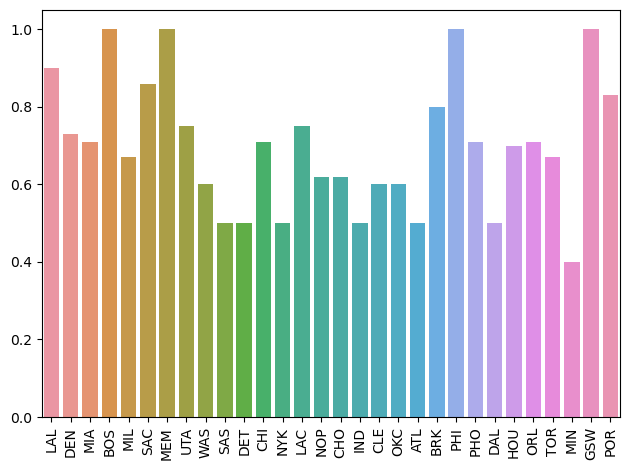

{'LAL': [0.9], 'DEN': [0.73], 'MIA': [0.71], 'BOS': [1.0], 'MIL': [0.67], 'SAC': [0.86], 'MEM': [1.0], 'UTA': [0.75], 'WAS': [0.6], 'SAS': [0.5], 'DET': [0.5], 'CHI': [0.71], 'NYK': [0.5], 'LAC': [0.75], 'NOP': [0.62], 'CHO': [0.62], 'IND': [0.5], 'CLE': [0.6], 'OKC': [0.6], 'ATL': [0.5], 'BRK': [0.8], 'PHI': [1.0], 'PHO': [0.71], 'DAL': [0.5], 'HOU': [0.7], 'ORL': [0.71], 'TOR': [0.67], 'MIN': [0.4], 'GSW': [1.0], 'POR': [0.83]}


In [19]:
df_pred_test, df_accuracy_teams = accuracy_teams(X, y, df)

In [20]:
df.to_csv('DataFrameForModel_0.2.csv', index=False)
df_pred_test.to_csv('Prediction-Result.csv', index=False)

In [21]:
df_accuracy_teams = df_accuracy_teams.T

In [22]:
df_accuracy_teams.to_csv('AccuracyTeams.csv')

In [25]:
df[df['Clust_H']==2]

,Home,H/A_H,Date,Away,H/A_A,Result,Game_ID,MP_Home,Tm_FG_Home,Tm_FG%_Home,...,AST_Diff_Home,AST_Diff_Away,PTS_Diff_Home,PTS_Diff_Away,+/-_Diff_Home,+/-_Diff_Away,Clust_H,Clust_A,Prob_W,Prob_L
0,LAL,Home,2020-12-25,DAL,Away,W,--00122225AADLLL,240.0,38.0,0.4690,...,0.416667,0.851064,0.127119,0.471831,-0.333333,-3.272727,2,1,0.500000,0.500000
1,DEN,Home,2020-12-25,LAC,Away,L,--00122225ACDELN,265.0,47.0,0.4800,...,0.717949,-0.047619,-0.333333,-1.196970,-5.500000,7.400000,2,0,0.500000,0.500000
2,MIA,Home,2020-12-25,NOP,Away,W,--00122225AIMNOP,240.0,42.0,0.5060,...,0.680000,0.307692,-0.295082,-0.352113,1.250000,5.777778,2,2,0.500000,0.500000
6,MEM,Home,2020-12-26,ATL,Away,L,--00122226AELMMT,240.0,49.0,0.5160,...,-3.250000,0.312500,0.182609,0.578947,1.285714,-1.250000,2,2,0.500000,0.500000
8,WAS,Home,2020-12-26,ORL,Away,L,--00122226ALORSW,240.0,39.0,0.4590,...,-0.064516,-0.375000,0.565217,0.041667,0.592593,0.615385,2,1,0.500000,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3644,MIA,Home,2023-04-09,ORL,Away,W,--00022349AILMOR,240.0,42.6,0.4950,...,-0.023256,0.196721,-0.138229,0.220408,2.833333,0.652459,2,1,0.318182,0.681818
3646,CLE,Home,2023-04-09,CHO,Away,L,--00022349CCEHLO,240.0,44.6,0.5058,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2,1,0.318182,0.681818
3647,CHI,Home,2023-04-09,DET,Away,W,--00022349CDEHIT,240.0,43.6,0.4922,...,0.385827,0.195876,0.293185,0.450909,0.138889,-0.062500,2,1,0.045455,0.954545
3649,NYK,Home,2023-04-09,IND,Away,L,--00022349DIKNNY,240.0,44.6,0.5004,...,0.000000,0.655556,0.000000,-0.197605,0.000000,-0.919390,2,1,0.318182,0.681818
